In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
import time

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [3]:
coordinates = list(lat_lngs)

In [4]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [5]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8e803445d34fddbca72e7d07d2871fc4


In [6]:
from citipy import citipy

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

621

In [8]:
#Import the datetime module from the datetime library. 
from datetime import datetime

In [9]:
#Create an empty list to hold the weather data.
city_data = []
#Print the beginning of the logging.
print("Beginning Data Retrieval       ")
print("-------------------------------")

#Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + "i"

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval       
-------------------------------
Processing Record 1 of Set 13 | ampanihy
Processing Record 2 of Set 13 | puerto concordia
Processing Record 3 of Set 13 | illoqqortoormiut
City not found. Skipping...
Processing Record 4 of Set 13 | kodiak
Processing Record 5 of Set 13 | salalah
Processing Record 6 of Set 13 | mineiros
Processing Record 7 of Set 13 | strezhevoy
Processing Record 8 of Set 13 | acarau
Processing Record 9 of Set 13 | pandan
Processing Record 10 of Set 13 | namangan
Processing Record 11 of Set 13 | salta
Processing Record 12 of Set 13 | hilo
Processing Record 13 of Set 13 | oktyabrskiy
Processing Record 14 of Set 13 | leningradskiy
Processing Record 15 of Set 13 | jamame
Processing Record 16 of Set 13 | kapaa
Processing Record 17 of Set 13 | namibe
Processing Record 18 of Set 13 | provideniya
Processing Record 19 of Set 13 | ribeira grande
Processing Record 20 of Set 13 | jamestown
Processing Record 21 of Set 13 | santiago del estero
Processin

Processing Record 31 of Set 16 | la ronge
Processing Record 32 of Set 16 | muisne
Processing Record 33 of Set 16 | vardo
Processing Record 34 of Set 16 | samusu
City not found. Skipping...
Processing Record 35 of Set 16 | armacao dos buzios
City not found. Skipping...
Processing Record 36 of Set 16 | coquimbo
Processing Record 37 of Set 16 | tsihombe
City not found. Skipping...
Processing Record 38 of Set 16 | general roca
Processing Record 39 of Set 16 | narsaq
Processing Record 40 of Set 16 | cherskiy
Processing Record 41 of Set 16 | atasu
Processing Record 42 of Set 16 | sahbuz
Processing Record 43 of Set 16 | tuatapere
Processing Record 44 of Set 16 | aller
Processing Record 45 of Set 16 | hohhot
Processing Record 46 of Set 16 | palabuhanratu
City not found. Skipping...
Processing Record 47 of Set 16 | tuy hoa
Processing Record 48 of Set 16 | fort-shevchenko
Processing Record 49 of Set 16 | west wendover
Processing Record 50 of Set 16 | udachnyy
Processing Record 1 of Set 17 | tume

Processing Record 15 of Set 20 | guhagar
Processing Record 16 of Set 20 | kuching
Processing Record 17 of Set 20 | bowen
Processing Record 18 of Set 20 | chupei
City not found. Skipping...
Processing Record 19 of Set 20 | mackenzie
Processing Record 20 of Set 20 | kidal
Processing Record 21 of Set 20 | le port
Processing Record 22 of Set 20 | fare
Processing Record 23 of Set 20 | keelung
Processing Record 24 of Set 20 | ossora
Processing Record 25 of Set 20 | nizhneyansk
City not found. Skipping...
Processing Record 26 of Set 20 | alzamay
Processing Record 27 of Set 20 | louisbourg
City not found. Skipping...
Processing Record 28 of Set 20 | imeni poliny osipenko
Processing Record 29 of Set 20 | arraias
Processing Record 30 of Set 20 | segezha
Processing Record 31 of Set 20 | eskasem
City not found. Skipping...
Processing Record 32 of Set 20 | ambatofinandrahana
Processing Record 33 of Set 20 | svetlyy
Processing Record 34 of Set 20 | kirakira
Processing Record 35 of Set 20 | filiates


City not found. Skipping...
Processing Record 48 of Set 23 | xam nua
Processing Record 49 of Set 23 | la plaine
Processing Record 50 of Set 23 | green river
Processing Record 1 of Set 24 | ust-kut
Processing Record 2 of Set 24 | muroto
Processing Record 3 of Set 24 | bubaque
Processing Record 4 of Set 24 | stromness
Processing Record 5 of Set 24 | pevek
Processing Record 6 of Set 24 | cap malheureux
Processing Record 7 of Set 24 | sawai madhopur
Processing Record 8 of Set 24 | warqla
City not found. Skipping...
Processing Record 9 of Set 24 | saint-pierre
Processing Record 10 of Set 24 | nabire
Processing Record 11 of Set 24 | muzhi
Processing Record 12 of Set 24 | jam sahib
Processing Record 13 of Set 24 | sosua
Processing Record 14 of Set 24 | panguna
Processing Record 15 of Set 24 | sargatskoye
Processing Record 16 of Set 24 | shingu
Processing Record 17 of Set 24 | mako
Processing Record 18 of Set 24 | kupang
Processing Record 19 of Set 24 | oyama
Processing Record 20 of Set 24 | k

In [10]:
len(city_data)

567

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
new_column_order=["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ampanihy,MG,2020-06-19 20:34:26,-24.70,44.75,62.11,69,0,10.02
1,Puerto Concordia,CO,2020-06-19 20:34:26,2.62,-72.76,83.32,68,4,5.88
2,Kodiak,US,2020-06-19 20:34:27,57.79,-152.41,53.60,76,90,11.41
3,Salalah,OM,2020-06-19 20:34:27,17.02,54.09,82.40,88,20,5.82
4,Mineiros,BR,2020-06-19 20:29:34,-17.57,-52.55,75.38,55,53,5.61
5,Strezhevoy,RU,2020-06-19 20:34:29,60.73,77.59,46.40,70,100,4.47
6,Acarau,BR,2020-06-19 20:34:29,-2.89,-40.12,78.58,85,75,12.71
7,Pandan,PH,2020-06-19 20:34:29,14.05,124.17,79.54,84,34,6.20
8,Namangan,UZ,2020-06-19 20:34:30,41.00,71.67,69.80,43,0,6.93
9,Salta,AR,2020-06-19 20:34:30,-24.79,-65.41,82.40,23,71,2.24


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
import time
#Get today's date in seconds
today = time.strftime("%x")
today

'06/19/20'

In [63]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [64]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

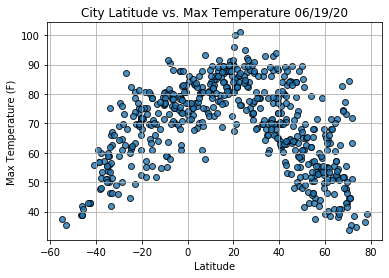

In [65]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

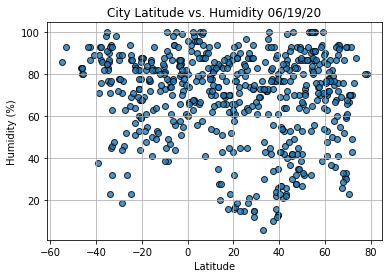

In [66]:
#Build the scatter plots for latitude vs humidity
plt.scatter(lats, 
           humidity, 
           edgecolor="black", linewidths = 1, marker = "o",
           alpha = 0.8, label = "Cities")

#Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity " + time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
#Save the figure. 
plt.savefig("weather_data/Fig2.png")
#Show plot
plt.show()

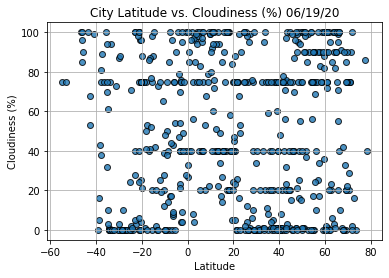

In [67]:
#Build the scatter plots for latitude vs humidity
plt.scatter(lats, 
           cloudiness, 
           edgecolor="black", linewidths = 1, marker = "o",
           alpha = 0.8, label = "Cities")

#Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) " + time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
#Save the figure. 
plt.savefig("weather_data/Fig3.png")
#Show plot
plt.show()

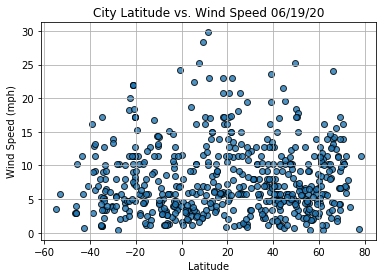

In [68]:
#Build the scatter plots for latitude vs humidity
plt.scatter(lats, 
           wind_speed, 
           edgecolor="black", linewidths = 1, marker = "o",
           alpha = 0.8, label = "Cities")

#Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed " + time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
#Save the figure. 
plt.savefig("weather_data/Fig2.png")
#Show plot
plt.show()

In [107]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
     # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [108]:
index13 = city_data_df.loc[13]
index13

City                       Jamame
Country                        SO
Date          2020-06-19 20:34:31
Lat                          0.07
Lng                         42.75
Max Temp                    76.86
Humidity                       80
Cloudiness                     27
Wind Speed                  11.61
Name: 13, dtype: object

In [109]:
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"]>= 0)]
northern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Puerto Concordia,CO,2020-06-19 20:34:26,2.62,-72.76,83.32,68,4,5.88
2,Kodiak,US,2020-06-19 20:34:27,57.79,-152.41,53.60,76,90,11.41
3,Salalah,OM,2020-06-19 20:34:27,17.02,54.09,82.40,88,20,5.82
5,Strezhevoy,RU,2020-06-19 20:34:29,60.73,77.59,46.40,70,100,4.47
7,Pandan,PH,2020-06-19 20:34:29,14.05,124.17,79.54,84,34,6.20


In [110]:
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"]< 0)]
southern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ampanihy,MG,2020-06-19 20:34:26,-24.70,44.75,62.11,69,0,10.02
4,Mineiros,BR,2020-06-19 20:29:34,-17.57,-52.55,75.38,55,53,5.61
6,Acarau,BR,2020-06-19 20:34:29,-2.89,-40.12,78.58,85,75,12.71
9,Salta,AR,2020-06-19 20:34:30,-24.79,-65.41,82.40,23,71,2.24
15,Namibe,AO,2020-06-19 20:34:31,-15.20,12.15,71.20,63,88,2.51


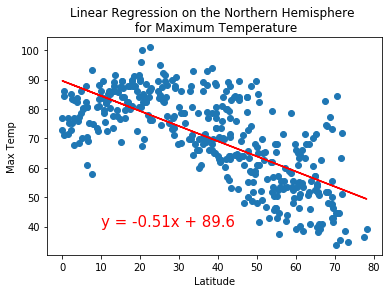

In [113]:
#Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Northern Hemisphere \n for Maximum Temperature", 
                       "Max Temp",(10,40))

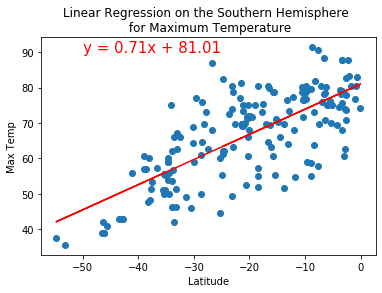

In [114]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

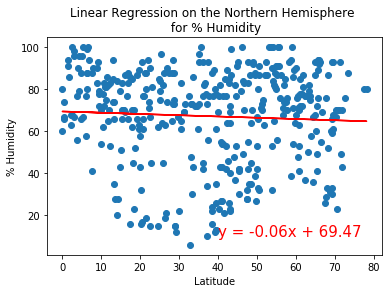

In [115]:
#Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

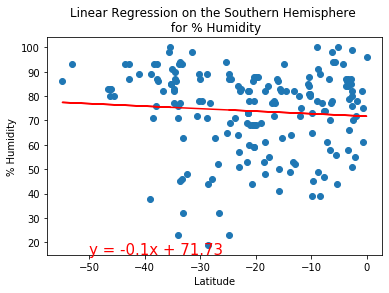

In [116]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

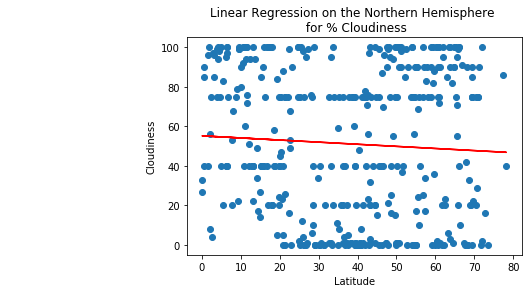

In [103]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere % Cloudiness', 'Cloudiness',(-50,15))

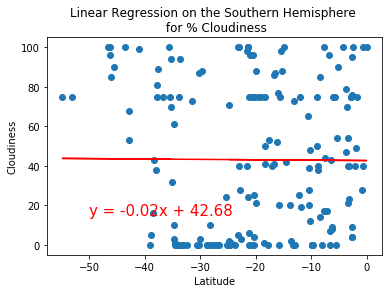

In [117]:

# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', 'Cloudiness',(-50,15))

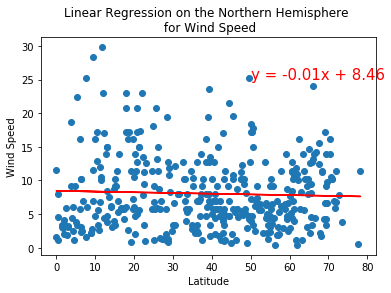

In [124]:

# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(50,25))

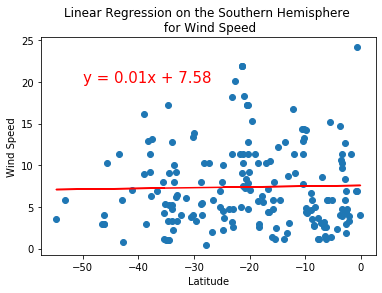

In [122]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,20))